<a href="https://colab.research.google.com/github/jnprogrammer/MachineLearning/blob/master/Long_Distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -q tensorflow-gpu==2.0.0-beta1
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [0]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool3D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
# build the dataset
# This is a nonlinear AND long-distance dataset
# (actually we will test long-distance vs. short-distance patterns)

#start with small T and increase it later

T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0


for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) #short distance
  # y = get_label(x, 0, 1, 2) #long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

# make visualization with xor3d.py 


In [8]:
# exmaple of a linear model that will fail
# it's classifcation now

i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

r = model.fit(
    X, Y,
    epochs=100,
    validation_split=0.5
)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 0s 153us/sample - loss: 0.7591 - accuracy: 0.4848 - val_loss: 0.6978 - val_accuracy: 0.5040
Epoch 2/100
2500/2500 [==============================] - 0s 68us/sample - loss: 0.6944 - accuracy: 0.5184 - val_loss: 0.6963 - val_accuracy: 0.4972
Epoch 3/100
2500/2500 [==============================] - 0s 76us/sample - loss: 0.6942 - accuracy: 0.5084 - val_loss: 0.6972 - val_accuracy: 0.5036
Epoch 4/100
2500/2500 [==============================] - 0s 75us/sample - loss: 0.6933 - accuracy: 0.5140 - val_loss: 0.6956 - val_accuracy: 0.4980
Epoch 5/100
2500/2500 [==============================] - 0s 76us/sample - loss: 0.6931 - accuracy: 0.5252 - val_loss: 0.6960 - val_accuracy: 0.5052
Epoch 6/100
2500/2500 [==============================] - 0s 69us/sample - loss: 0.6928 - accuracy: 0.5240 - val_loss:

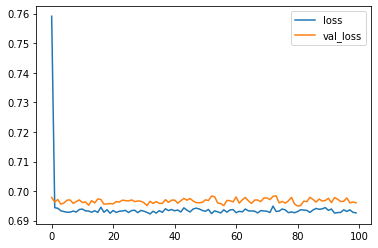

In [9]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

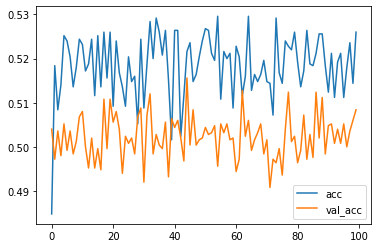

In [11]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
# now I'm trying a simple RNN to solve this problem
inputs = np.expand_dims(X, -1)

#make the RNN
i = Input(shape=(T, D))

#method1
# x = LSTM(5)(i)
x = SimpleRNN(5)(i)
# x = GRU(5)(i)

#method2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    # optimizer='rsmprop',
    # optimizer='adam',
    optimizer=Adam(lr=0.01),
    # optimizer=SGD(lr=0.1, momentum=0.9),
    metrics=['accuracy'],
)


In [14]:
# train the RNN
r = model.fit(
    inputs,Y,
    epochs=200,
    validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 1s 397us/sample - loss: 0.6900 - accuracy: 0.5452 - val_loss: 0.6647 - val_accuracy: 0.6348
Epoch 2/200
2500/2500 [==============================] - 0s 163us/sample - loss: 0.6420 - accuracy: 0.6816 - val_loss: 0.5963 - val_accuracy: 0.7340
Epoch 3/200
2500/2500 [==============================] - 0s 158us/sample - loss: 0.5516 - accuracy: 0.7664 - val_loss: 0.5053 - val_accuracy: 0.8020
Epoch 4/200
2500/2500 [==============================] - 0s 152us/sample - loss: 0.4549 - accuracy: 0.8316 - val_loss: 0.4360 - val_accuracy: 0.8324
Epoch 5/200
2500/2500 [==============================] - 0s 152us/sample - loss: 0.3857 - accuracy: 0.8644 - val_loss: 0.3727 - val_accuracy: 0.8624
Epoch 6/200
2500/2500 [==============================] - 0s 162us/sample - loss: 0.3305 - accuracy: 0.8896 - val_loss: 0.3282 - val_accuracy: 0.8876
Epoch 7/200
2500/2500 [==============================] - 0

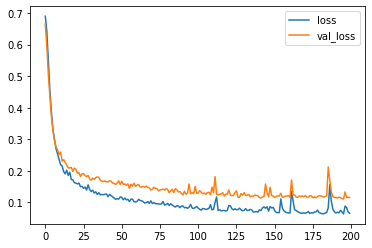

In [15]:
# plotting the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

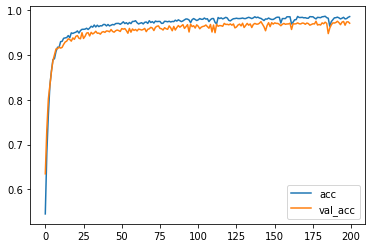

In [16]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
# Now im trying the Long distance problem

#start with a small T and increase it later

T = 10
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) #long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)


In [20]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN

i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy'],
)

# train the RNN

r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 1s 405us/sample - loss: 0.7010 - accuracy: 0.5036 - val_loss: 0.6995 - val_accuracy: 0.4940
Epoch 2/200
2500/2500 [==============================] - 0s 183us/sample - loss: 0.6931 - accuracy: 0.5080 - val_loss: 0.6996 - val_accuracy: 0.4968
Epoch 3/200
2500/2500 [==============================] - 0s 183us/sample - loss: 0.6923 - accuracy: 0.5124 - val_loss: 0.6969 - val_accuracy: 0.4868
Epoch 4/200
2500/2500 [==============================] - 0s 169us/sample - loss: 0.6922 - accuracy: 0.5188 - val_loss: 0.6971 - val_accuracy: 0.4904
Epoch 5/200
2500/2500 [==============================] - 0s 156us/sample - loss: 0.6919 - accuracy: 0.5240 - val_loss: 0.6991 - val_accuracy: 0.4916
Epoch 6/200
2500/2500 [==============================] - 0s 166us/sample - loss: 0.6914 - accuracy: 0.5232 - val_loss: 0.7002 - val_accuracy: 0.4920
Epoch 7/200
2500/2500 [==============================] - 0

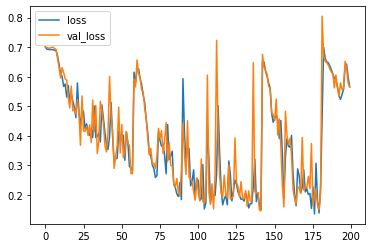

In [21]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()